<a href="https://colab.research.google.com/github/vish2020KC/Self-Paced-Content/blob/main/Data_Visualization_of_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt

TypeError: upload() takes 0 positional arguments but 1 was given

In [21]:
df = pd.read_csv("/content/titanic.csv")

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
df['Fare'].skew()

4.787316519674893

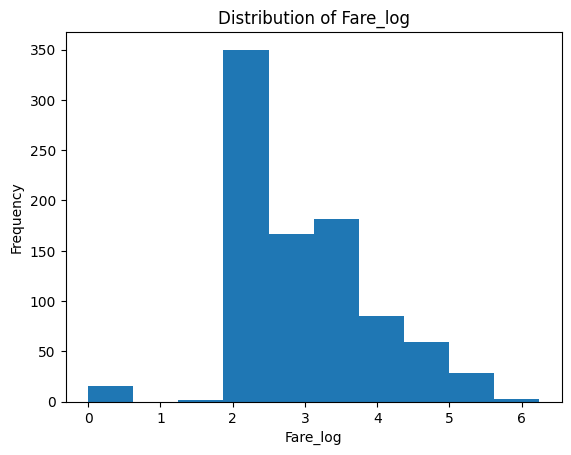

In [44]:
if df['Fare'].skew() > 0.5:
  df['Fare_log'] = np.log(df['Fare'] + 1)
  Fare_column = 'Fare_log'
else:
  Fare_column = 'Fare'
plt.hist(df[Fare_column])
plt.xlabel(Fare_column)
plt.ylabel("Frequency")
plt.title("Distribution of " + Fare_column)
plt.show()


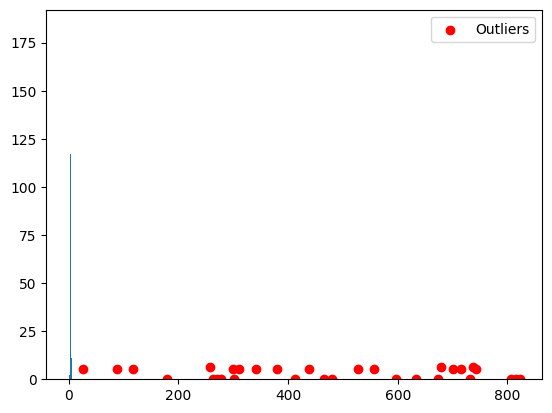

In [48]:
q1 = df[Fare_column].quantile(0.25)
q3 = df[Fare_column].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df[Fare_column] < lower_bound) | (df[Fare_column] > upper_bound)]
plt.hist(df[Fare_column], bins=20)
plt.scatter(outliers.index, outliers[Fare_column], color='red', label='Outliers')
plt.legend()
plt.show()

In [50]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_log'],
      dtype='object')

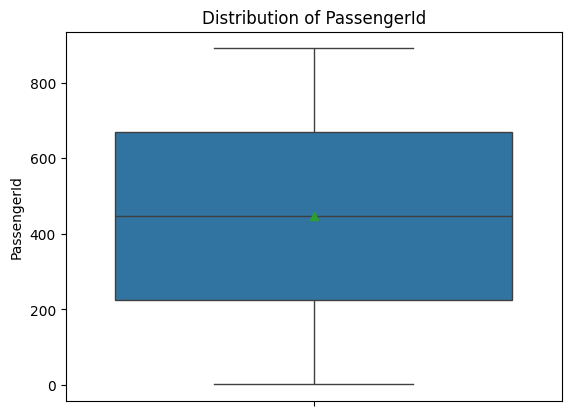

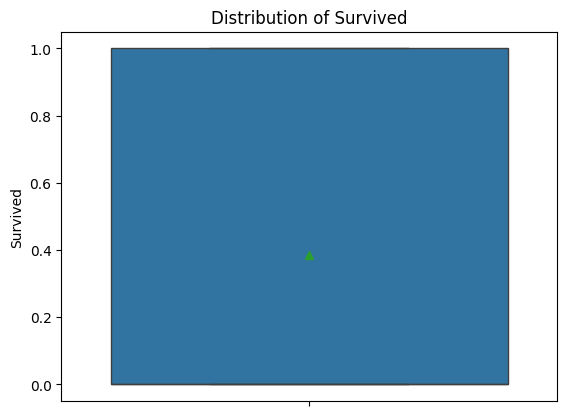

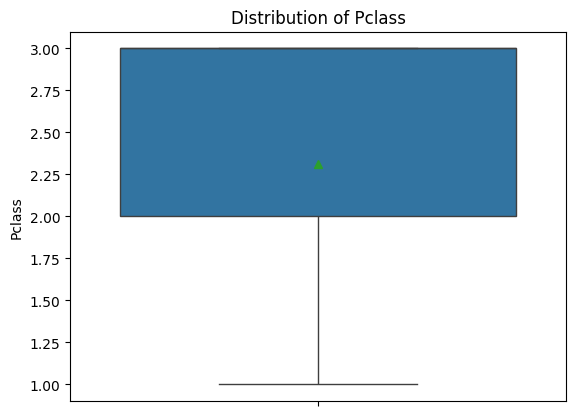

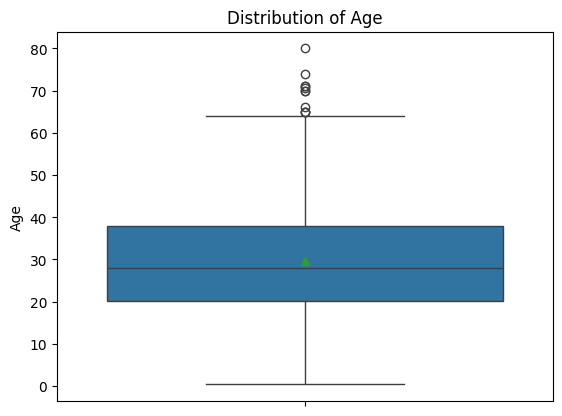

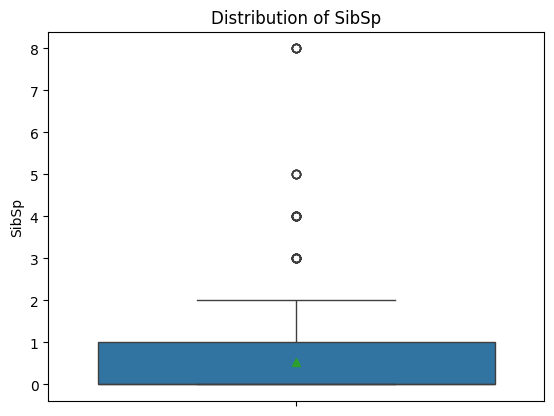

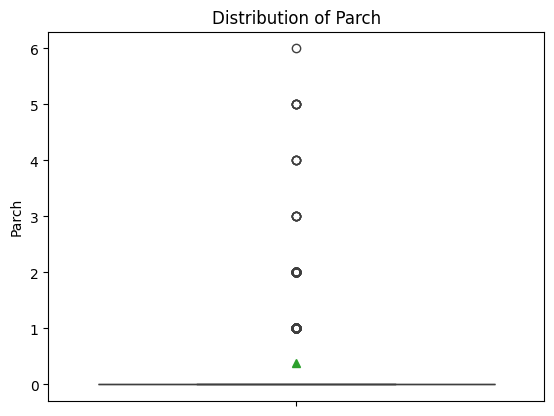

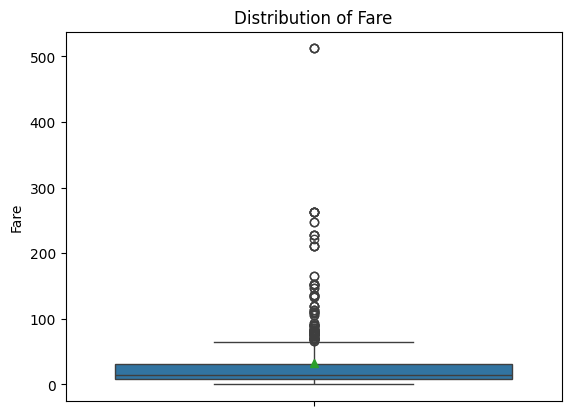

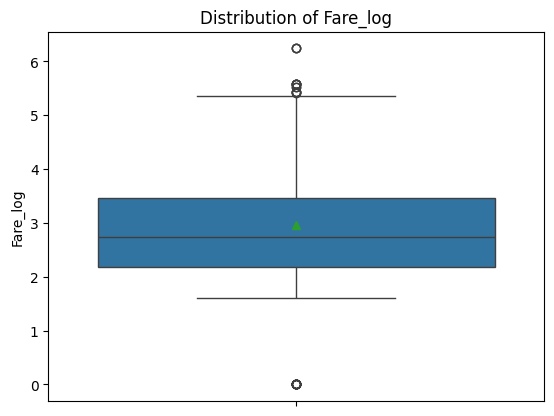

In [52]:
for col in df.select_dtypes(include=[np.number]):
    sns.boxplot(y=col, showmeans=True, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


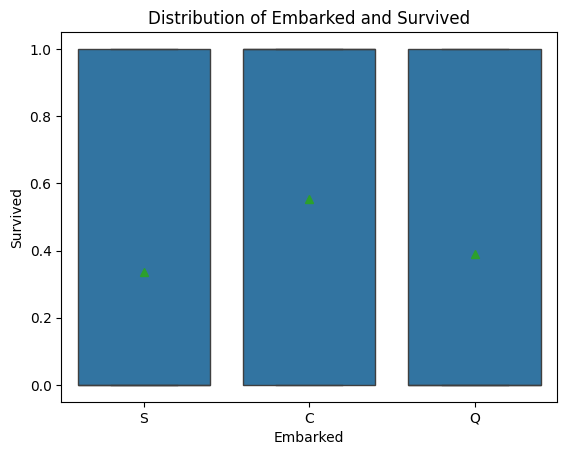

In [53]:
#'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',  'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'
sns.boxplot(
    x = df["Embarked"],
    y = df["Survived"],
    showmeans=True,
    data=df
    )
plt.title(f"Distribution of Embarked and Survived")
plt.show()

In [55]:
# Value counts for Pclass, to get the frequency counts for each unique value in a categorical column,
pclass_counts = df["Pclass"].value_counts()
print("Pclass Counts:\n", pclass_counts)
# Value counts for Survived (with proportions mostly column)
survived_counts = df["Survived"].value_counts(normalize=True) * 100 #normalize the counts to obtain proportions using the normalize=True option
print("\nSurvived Counts (proportions):\n", survived_counts)

Pclass Counts:
 3    491
1    216
2    184
Name: Pclass, dtype: int64

Survived Counts (proportions):
 0    61.616162
1    38.383838
Name: Survived, dtype: float64


In [57]:
# I am creating  a crosstab table with counts. creating a crosstabulation table showing the counts of occurrences for combinations of two or more categorical variables, like Pclass and Survived
pclass_survival_counts = pd.crosstab(df["Pclass"], df["Survived"], values="passenger_id", aggfunc="count")
print("\nCross-tabulation of Pclass and Survived:\n", pclass_survival_counts)



Cross-tabulation of Pclass and Survived:
 Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Fare_log     891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Fare_log         0
dtype: int64

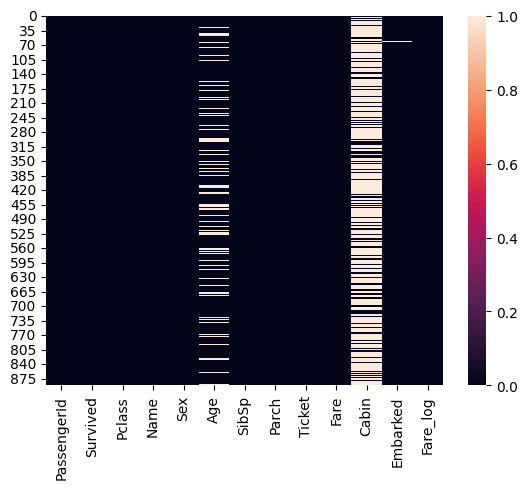

In [60]:
#Removing pending null values/missing values
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

In [61]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [64]:
df['Cabin'].fillna(df['Embarked'].mode()[0], inplace=True)

In [65]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Fare_log       0
dtype: int64

In [66]:
#Yes fucking yes, the null values are all removed


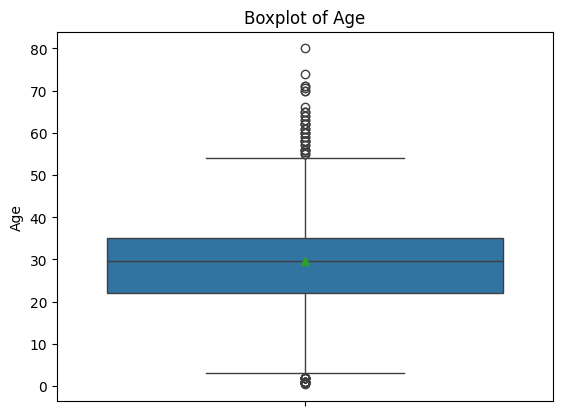

Outliers based on z-scores for Age: [96, 116, 493, 630, 672, 745, 851]
Outliers based on IQR for Age: [7, 11, 15, 16, 33, 54, 78, 94, 96, 116, 119, 152, 164, 170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305, 326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492, 493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659, 672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851, 879]


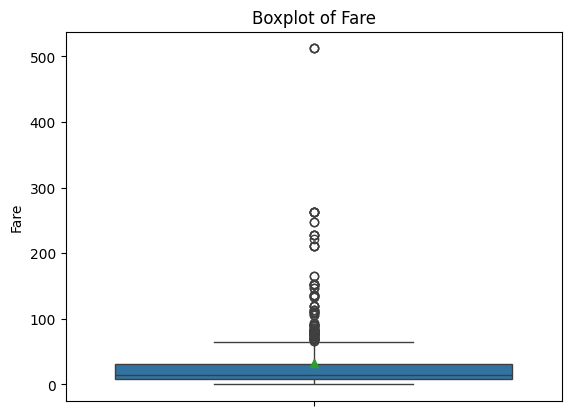

Outliers based on z-scores for Fare: [27, 88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679, 689, 700, 716, 730, 737, 742, 779]
Outliers based on IQR for Fare: [1, 27, 31, 34, 52, 61, 62, 72, 88, 102, 118, 120, 124, 139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257, 258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310, 311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373, 375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486, 496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581, 585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681, 689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765, 779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879]


In [82]:
for col in ['Age', 'Fare']:
   sns.boxplot(y=col, showmeans=True, data=df)
   plt.title(f"Boxplot of {col}") # Boxplots
   plt.show()

  # Z-scores
   z_scores = (df[col] - df[col].mean()) / df[col].std()
   outliers_zscore = z_scores[(z_scores < -3) | (z_scores > 3)]
   print(f"Outliers based on z-scores for {col}: {outliers_zscore.index.tolist()}")
   q1 = df[col].quantile(0.25)  # IQR
   q3 = df[col].quantile(0.75)
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
   print(f"Outliers based on IQR for {col}: {outliers_iqr.index.tolist()}")


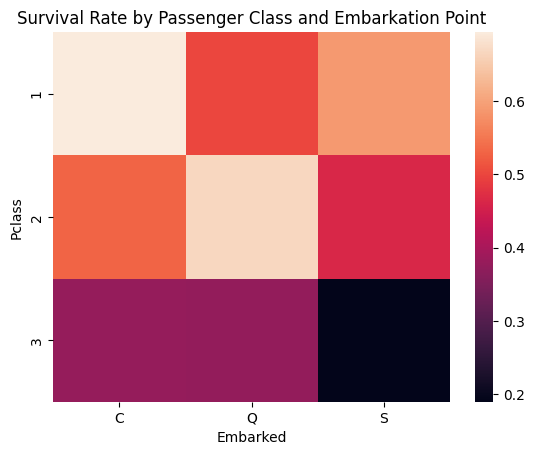

In [83]:
#1. Heatmap:  relationship between passenger survival and two categorical variables, like Pclass and Embarked
sns.heatmap(df.pivot_table(index='Pclass', columns='Embarked', values='Survived', aggfunc='mean'))
plt.title("Survival Rate by Passenger Class and Embarkation Point")
plt.show()

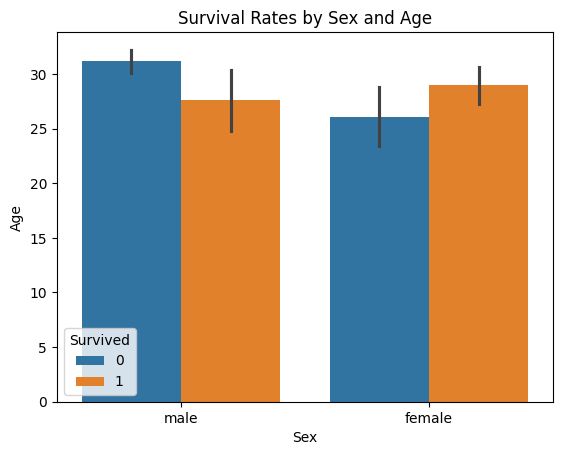

In [84]:
#distribution of passengers across various demographics (age, gender, etc.) and highlight groups with higher risk based on lower survival rates.
sns.barplot(x="Sex", y="Age", hue="Survived", data=df)
plt.title("Survival Rates by Sex and Age")
plt.show()

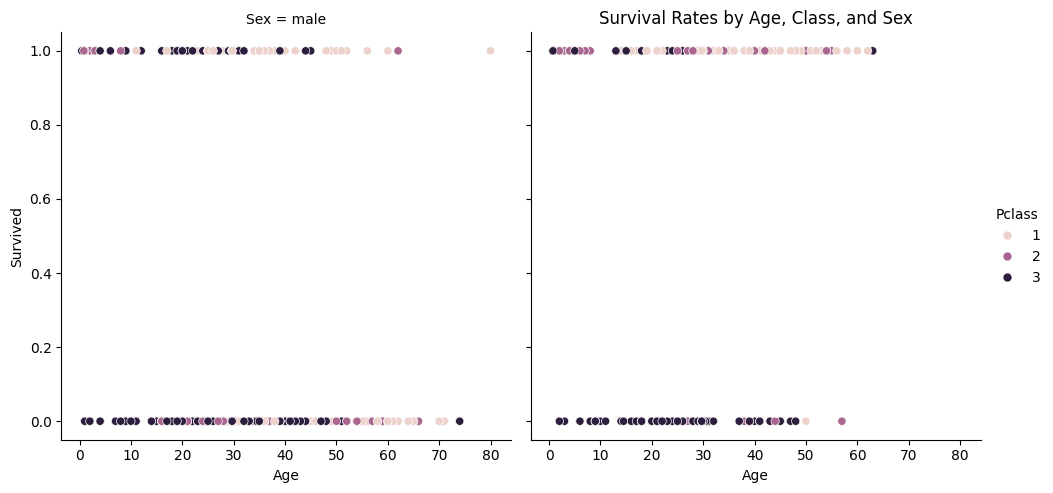

In [85]:
#combined influence of multiple variables (age, class, gender) on survival rates.
sns.relplot(x="Age", y="Survived", hue="Pclass", col="Sex", data=df)
plt.title("Survival Rates by Age, Class, and Sex")
plt.show()

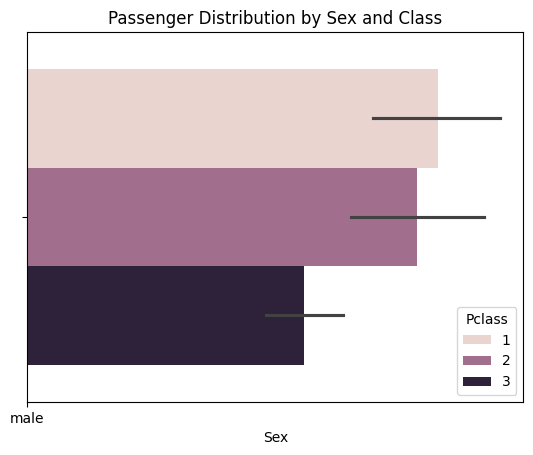

In [88]:
#distribution of passengers across demographic groups like age, gender, class, or embarkation point.
sns.barplot(x="Sex", orient="h", hue="Pclass", data=df)
plt.title("Passenger Distribution by Sex and Class")
plt.show()

In [92]:
import plotly.express as px

fig = px.scatter(df, x="Age", y="Survived", color="Pclass", size="Age", opacity=0.8)
fig.update_layout(
    title="Passenger Demographics by Age, Survival, and Class",
    hovermode="closest"
)
fig.show()

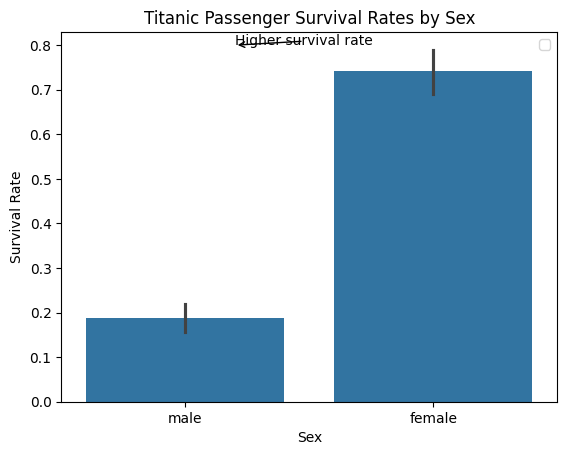

In [96]:


# Create a basic bar chart
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Titanic Passenger Survival Rates by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.legend()
plt.annotate("Higher survival rate", xy=(0.2, 0.8), arrowprops=dict(facecolor='green', arrowstyle='->'))

# Save the visualization
plt.savefig("passenger_survival_by_sex.png")
